In [1]:
import pandas as pd
import statistics as s
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from database_key import server_creds

In [2]:
engine = create_engine('postgresql://' + server_creds + '@localhost:5432/09-SQL Homework')
connection = engine.connect()

In [3]:
# load the salaries table.
salaries_df = pd.read_sql_table('salaries',engine)
salaries_df.head()

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [18]:
salaries_df.isnull().sum()

emp_no    0
salary    0
dtype: int64

In [4]:
# load the employees table.
employees_df = pd.read_sql_table('employees',engine)
employees_df = employees_df.sort_values(by=['emp_no'])
employees_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
200187,10001,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
166677,10002,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
73092,10003,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
203459,10004,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
141227,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [19]:
employees_df.isnull().sum()

emp_no        0
emp_title     0
birth_date    0
first_name    0
last_name     0
sex           0
hire_date     0
dtype: int64

In [5]:
# load the titles table.
titles_df = pd.read_sql_table('titles',engine)
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [20]:
titles_df.isnull().sum()

title_id    0
title       0
dtype: int64

In [6]:
# merge the employees together with their salaries. 
complete_df = pd.merge(employees_df, salaries_df, how='inner', on='emp_no', sort='true')
complete_df = complete_df.sort_values(by=['emp_no'])
complete_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,10001,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,60117.0
1,10002,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828.0
2,10003,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,40006.0
3,10004,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054.0
4,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228.0


In [15]:
# check for nulls
complete_df.isnull().sum()

emp_no        0
emp_title     0
birth_date    0
first_name    0
last_name     0
sex           0
hire_date     0
salary        0
dtype: int64

Text(0.5, 0, 'Salary')

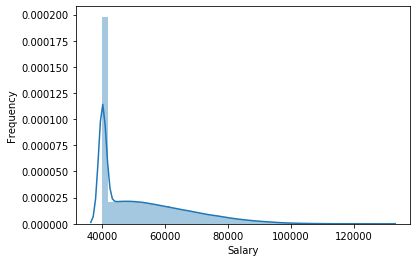

In [7]:
# Create a histogram to visualize the most common salary ranges for employees.
ax0=sns.distplot( a=complete_df['salary'], hist=True, kde=True, rug=False )
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Salary')

In [8]:
# now we need to attach titles
new_df = pd.merge(complete_df, titles_df['title'],left_on='emp_title', right_on=titles_df['title_id'], how='inner')
new_df = new_df.sort_values(by=['emp_no'])
new_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,title
0,10001,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,60117.0,Senior Engineer
97747,10002,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828.0,Staff
1,10003,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,40006.0,Senior Engineer
2,10004,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054.0,Senior Engineer
97748,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228.0,Staff


In [16]:
# check for introduced nulls.
new_df.isnull().sum()

emp_no        0
emp_title     0
birth_date    0
first_name    0
last_name     0
sex           0
hire_date     0
salary        0
title         0
dtype: int64

In [9]:
# get the group by averages. we only want the title and salary.
new_df_mean = new_df.groupby('title')[['salary']].mean()
new_df_mean = new_df_mean.sort_values(by=['salary'])
new_df_mean = new_df_mean.reset_index()
new_df_mean

,title,salary
0,Senior Engineer,48506.799871
1,Engineer,48535.336511
2,Assistant Engineer,48564.434447
3,Technique Leader,48582.896092
4,Manager,51531.041667
5,Staff,58465.382850
6,Senior Staff,58550.172704


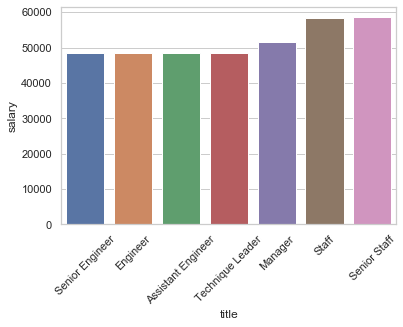

In [10]:
# graph it!
sns.set(style="whitegrid")
plt.xticks(rotation=45)
ax1 = sns.barplot(x='title', y='salary', data=new_df_mean)


In [11]:
# done!